<h1> Networkx Experiments

In [ ]:
# Getting familiar with Networkx

In [99]:
import networkx as nx
G=nx.Graph()

In [47]:
H=nx.path_graph(10)
G.add_nodes_from(H)

In [54]:
G.clear()

In [101]:
>>> G.add_edges_from([(1,2),(1,3)])
>>> G.add_node(1)
>>> G.add_edge(1,2)
>>> G.add_node("spam")       # adds node "spam"
>>> G.add_nodes_from("spam") # adds 4 nodes: 's', 'p', 'a', 'm'

In [59]:
G.add_edge('spam', 1)

In [71]:
G.nodes

NodeView((1, 2, 3, 'spam', 's', 'p', 'a', 'm'))

In [64]:
list(G.neighbors(1))

[2, 3, 'spam']

In [72]:
G.remove_nodes_from('spam')

In [74]:
G.edges

EdgeView([(1, 2), (1, 3), (1, 'spam')])

In [78]:
>>> H=nx.DiGraph(G)   # create a DiGraph using the connections from G

In [87]:
F = nx.convert_node_labels_to_integers(G)

In [100]:
F.nodes[0]

{}

In [104]:
F.nodes[0]['color'] = 0

In [106]:
F.nodes[0]

{'color': 0}

In [109]:
G[1][2]

{}

In [114]:
>>> FG=nx.Graph()
>>> FG.add_weighted_edges_from([(1,2,0.125),(1,3,0.75),(2,4,1.2),(3,4,0.375)])
>>> for n,nbrs in FG.adjacency():
...    for nbr,eattr in nbrs.items():
...        data=eattr['weight']
...        if data<0.5: print('(%d, %d, %.3f)' % (n,nbr,data))

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


In [120]:
G.nodes[2]['room'] = 714

In [133]:
G.nodes(data=True)

NodeDataView({1: {}, 2: {'room': 714}, 3: {}, 'spam': {}})

In [132]:
G.add_edge(1, 2, foo='bar')

In [126]:
G.nodes(data=True)

NodeDataView({1: {}, 2: {'room': 714}, 3: {}, 'spam': {}})

In [137]:
>>> H = nx.Graph(DG) # convert G to undirected graph

In [138]:
H

In [139]:
DG

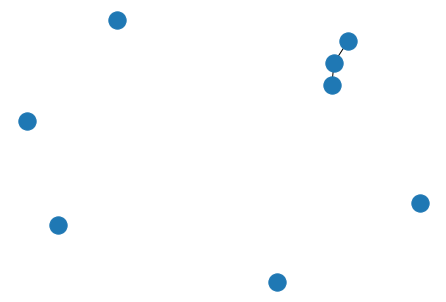

In [102]:
>>> import matplotlib.pyplot as plt
>>> nx.draw(G)

In [ ]:
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout


G = nx.DiGraph()
G.add_node(1,level=1)
G.add_node(2,level=2)
G.add_node(3,level=2)
G.add_node(4,level=3)

G.add_edge(1,2)
G.add_edge(1,3)
G.add_edge(2,4)

nx.draw(G, pos=graphviz_layout(G), node_size=1600, cmap=plt.cm.autumn,
        node_color=range(len(G)),
        prog='acyclic')

<h1> Attempt to create Epidemiology net

In [86]:
%load_ext autoreload

%autoreload 2
import lib.network as net

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [88]:
res = net.Network()
res.init_random(n=50, k=10, weighted=False)

In [89]:
res.avg_degree()

10.0

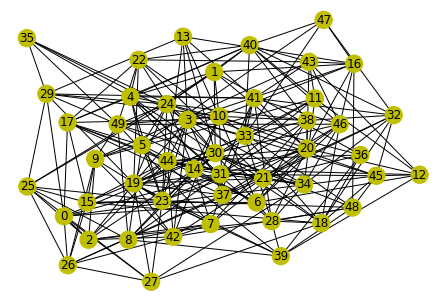

In [90]:
res.draw()

In [91]:
import copy
res2 = copy.deepcopy(res)
res2.noising_links()

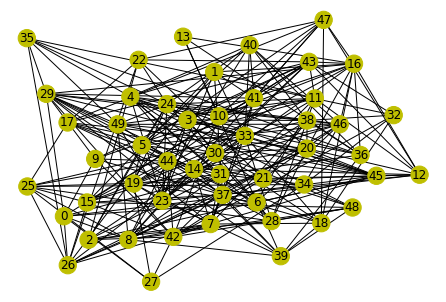

In [92]:
res2.draw(res.pos)

In [93]:
trueNet = net.get_random(n=20, k=10)

In [94]:
knowNet = net.get_dual(trueNet, z_add=5, z_rem=5)

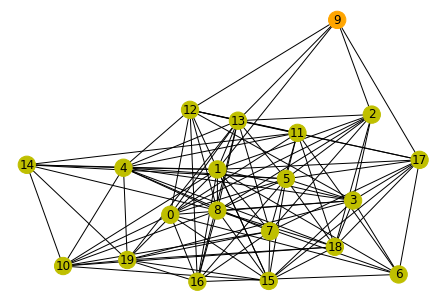

In [95]:
trueNet.change_state(9, 'E')
trueNet.draw()

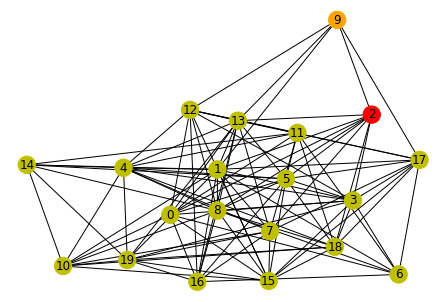

In [104]:
trueNet.change_state(2, 'I')
trueNet.draw()

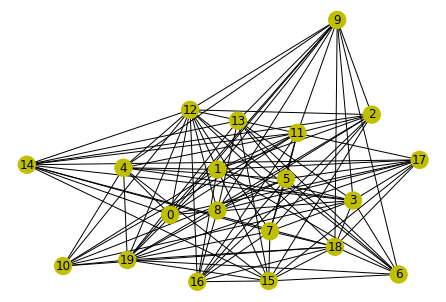

In [105]:
knowNet.draw(trueNet.pos)

In [97]:
knowNet.overlap

0.3333333333333333

<h1> Running experiments

In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
import run
import lib.stats as stat
import lib.utils as utils
import lib.network as net
import lib.simulation as sim

In [4]:
import importlib
importlib.reload(stat)

<module 'lib.stats' from 'D:\\OneDrive - University of Southampton\\PhD\\Contact\\lib\\stats.py'>

In [83]:
# Dictionary of full summaries for all experiments (across overlaps and tracing rates)
try:
    sts = utils.get_pkl('sts')
except:
    sts = {}

In [85]:
sts[1]['args']

{'beta': 0.1,
 'alpha': 0.27027027027027023,
 'gamma': 0.2631578947368421,
 'taur': 0.1,
 'taut': 0.1,
 'tautrange': True,
 'gammatau': 0.5,
 'netsize': 1000,
 'k': 10,
 'draw': False,
 'dual': False,
 'overlap': 0.08,
 'zadd': 5,
 'zrem': 5,
 'nnets': 15,
 'niters': 30,
 'nevents': 0,
 'seed': 35,
 'multip': True,
 'exposed': False,
 'spontan': False,
 'r0': 0.38000000000000006,
 'true-overlap': 1}

In [28]:
# Run full network
print('=== Run Full Net ===')
st = run.run_mock(netsize=1000, multip=True, dual=False, nnets=15, niters=30, nevents=0, tautrange=True, seed=35)
utils.pkl(st)
sts[1] = st.full_summary()
utils.pkl(sts)

=== Run Full Net ===
For taut = 0
Simulating network - No. 0
100%|███████████████████████████████████████████████████████████████████████████████| 30/30 [00:42<00:00,  1.42s/it]
Simulating network - No. 1
100%|███████████████████████████████████████████████████████████████████████████████| 30/30 [00:36<00:00,  1.23s/it]
Simulating network - No. 2
100%|███████████████████████████████████████████████████████████████████████████████| 30/30 [00:35<00:00,  1.19s/it]
Simulating network - No. 3
100%|███████████████████████████████████████████████████████████████████████████████| 30/30 [00:34<00:00,  1.16s/it]
Simulating network - No. 4
100%|███████████████████████████████████████████████████████████████████████████████| 30/30 [00:35<00:00,  1.19s/it]
Simulating network - No. 5
100%|███████████████████████████████████████████████████████████████████████████████| 30/30 [00:37<00:00,  1.25s/it]
Simulating network - No. 6
100%|██████████████████████████████████████████████████████████████████████

In [ ]:
# Run for overlaps
overlaps = [0, .08, .29, .53, .73, .85]

for overlap in overlaps:
    print('=== OVERLAP -', overlap, '===')
    st = run.run_mock(netsize=1000, multip=True, dual=True, overlap=overlap, nnets=15, niters=30, nevents=0, tautrange=True, seed=35)
    utils.pkl(st, 'st' + str(overlap))
    sts[overlap] = st.full_summary()
utils.pkl(sts)

For taut = 0
Simulating network - No. 0
Running iteration 0:                                                                                                
  0%|                                                                                         | 0/1 [00:00<?, ?it/s]

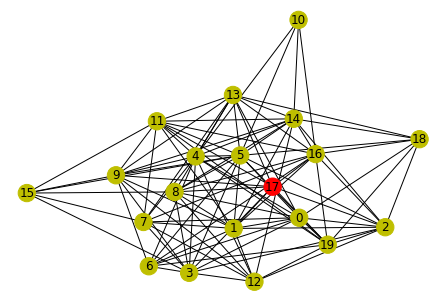

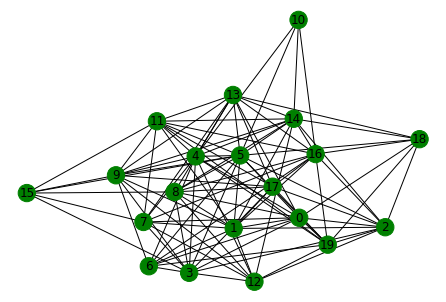

---> Result:20 total infected persons over time.                                                                    
100%|█████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.05it/s]


In [12]:
import importlib
importlib.reload(run)
st = run.run_mock(netsize=20, multip=False, dual=False, nnets=1, niters=1, nevents=0, tautrange=False, taut=0, seed=35, draw=True)

In [15]:
overlaps = [0, .08, .29, .53, .73, .85]
for overlap in overlaps:
    stik = utils.get_pkl('st'+str(overlap))
    sts[overlap] = stik.full_summary()

In [107]:
sts[0.08][.5]['average-max-infected']

238.2

In [109]:
stik[.5][5][29][-1].time

59.989296658971035

<h1> Replotting everything

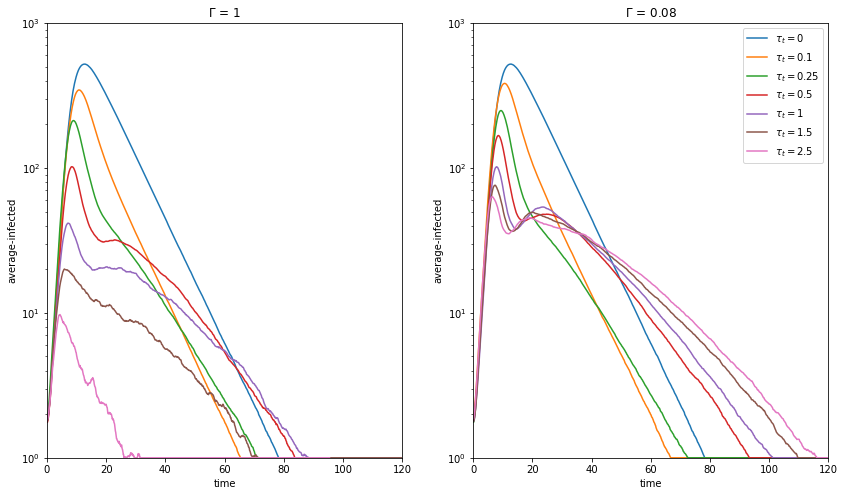

In [75]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14, 8))
ax[0].set_title('$\Gamma$ = 1')
ax[1].set_title('$\Gamma$ = 0.08')
ax[0].set_ylim(1, 1000)
ax[1].set_ylim(1, 1000)
ax[0].set_xlabel('time')
ax[1].set_xlabel('time')
ax[0].set_ylabel('average-infected')
ax[1].set_ylabel('average-infected')
ax[0].set_yscale('log')
ax[1].set_yscale('log')
to_plot = sts[1][0]['average-infected']
to_plot[to_plot < 1] = 1
ax[0].plot(sts[1][0]['time'], to_plot, label=0)
ax[1].plot(sts[1][0]['time'], to_plot, label=r'$\tau_t=0$')
for taut in sts[0]:
    if taut == .75:
        continue
    try:
        to_plot = sts[1][taut]['average-infected']
#         to_plot[to_plot < 1] = 1
        ax[0].set_xlim(0, 120)
        ax[0].plot(sts[1][taut]['time'], to_plot, label=r'$\tau_t=$'+str(taut))
        ax[1].set_xlim(0, 120)
        to_plot = sts[.08][taut]['average-infected']
#         to_plot[to_plot < 1] = 1
        ax[1].plot(sts[.08][taut]['time'], to_plot, label=r'$\tau_t=$'+str(taut))
    except:
        pass
plt.legend()
plt.savefig('fig/avg-infected-overlap-1and.08-with-time.png')

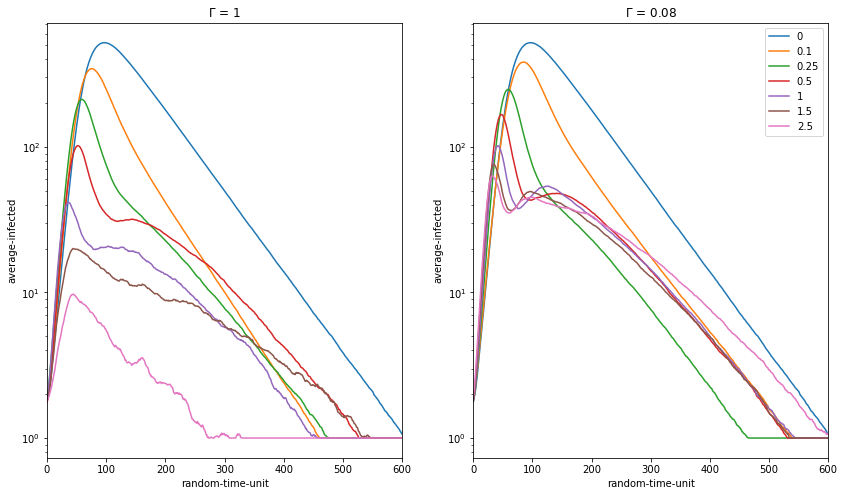

In [77]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14, 8))
ax[0].set_title('$\Gamma$ = 1')
ax[1].set_title('$\Gamma$ = 0.08')
ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[0].set_xlabel('random-time-unit')
ax[1].set_xlabel('random-time-unit')
ax[0].set_ylabel('average-infected')
ax[1].set_ylabel('average-infected')
to_plot = sts[1][0]['average-infected']
to_plot[to_plot < 1] = 1
ax[0].plot(to_plot, label=0)
ax[1].plot(to_plot, label=0)
for taut in sts[0]:
    if taut == .75:
        continue
    try:
        to_plot = sts[1][taut]['average-infected']
        to_plot[to_plot < 1] = 1
        ax[0].set_xlim(0, 600)
        ax[0].plot(to_plot, label=taut)
        ax[1].set_xlim(0, 600)
        to_plot = sts[.08][taut]['average-infected']
        to_plot[to_plot < 1] = 1
        ax[1].plot(to_plot, label=taut)
    except:
        pass
plt.legend()
plt.savefig('fig/avg-infected-overlap-1and.08.png')

In [117]:
utils.get_z_for_overlap(10, .08)

8.518518518518519

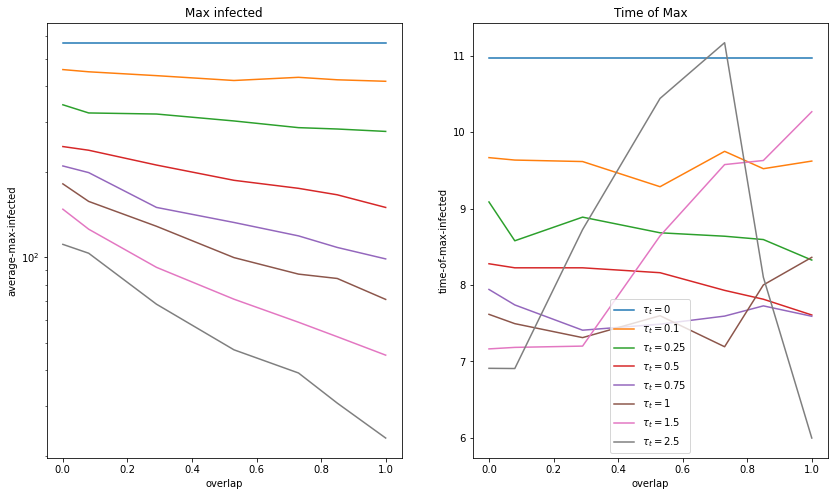

In [81]:
import matplotlib.pyplot as plt
overlaps = sorted(sts.keys())

fig, ax = plt.subplots(1, 2, figsize=(14, 8))
ax[0].set_title('Max infected')
ax[1].set_title('Time of Max')
ax[0].set_yscale('log')
ax[0].set_xlabel('overlap')
ax[0].set_ylabel('average-max-infected')
to_plot = sts[1][0]['average-max-infected']
# to_plot[to_plot < 1] = 1
ax[1].set_xlabel('overlap')
ax[1].set_ylabel('time-of-max-infected')
ax[0].plot(overlaps, [sts[1][0]['average-max-infected']] * len(overlaps), label=0)
ax[1].plot(overlaps, [sts[1][0]['average-time-of-max-infected']] * len(overlaps), label=r'$\tau_t=0$')

for taut in sts[0]:
    if type(taut) == str:
        continue
    to_plot = []
    to_plot_time = []
    for overlap in overlaps:
        try:
            to_plot.append(sts[overlap][taut]['average-max-infected'])
            to_plot_time.append(sts[overlap][taut]['average-time-of-max-infected'])
        except:
            print('da')
    ax[0].plot(overlaps, to_plot, label=r'$\tau_t=$'+str(taut))
    ax[1].plot(overlaps, to_plot_time, label=r'$\tau_t=$'+str(taut))
plt.legend()
plt.savefig('fig/max-infected-and-time')

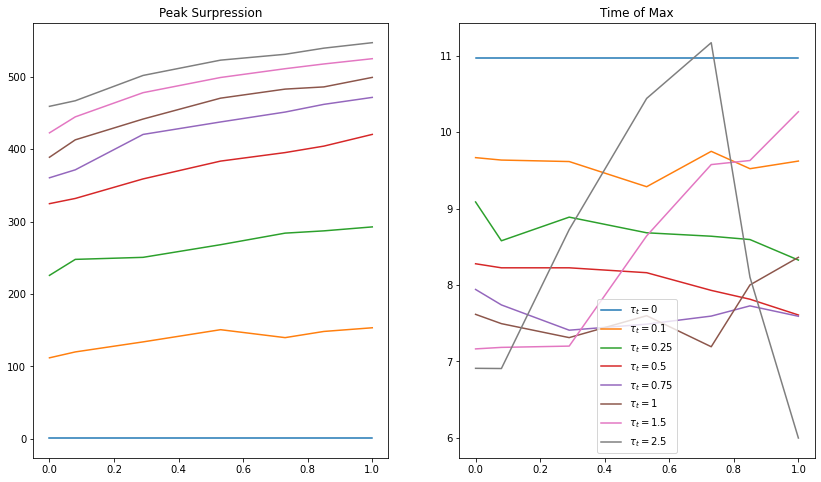

In [71]:
import matplotlib.pyplot as plt
overlaps = sorted(sts.keys())

fig, ax = plt.subplots(1, 2, figsize=(14, 8))
# ax[0].set_yscale('log')
to_plot = sts[1][0]['average-max-infected']
# to_plot[to_plot < 1] = 1
ax[0].plot(overlaps, [1] * len(overlaps), label=0)
ax[1].plot(overlaps, [sts[1][0]['average-time-of-max-infected']] * len(overlaps), label=r'$\tau_t=0$')

for taut in sts[0]:
    if type(taut) == str:
        continue
    to_plot = []
    to_plot_time = []
    for overlap in overlaps:
        try:
            to_plot.append(- sts[overlap][taut]['average-max-infected'] + sts[1][0]['average-max-infected'])
            to_plot_time.append(sts[overlap][taut]['average-time-of-max-infected'])
        except:
            pass
    ax[0].plot(overlaps, to_plot, label=r'$\tau_t=$'+str(taut))
#     ax[1].set_title('Time to max')
    ax[1].plot(overlaps, to_plot_time, label=r'$\tau_t=$'+str(taut))
ax[0].set_title('Peak Surpression')
ax[1].set_title('Time of Max')
plt.legend()
plt.savefig('fig/peak-surpression-and-time')

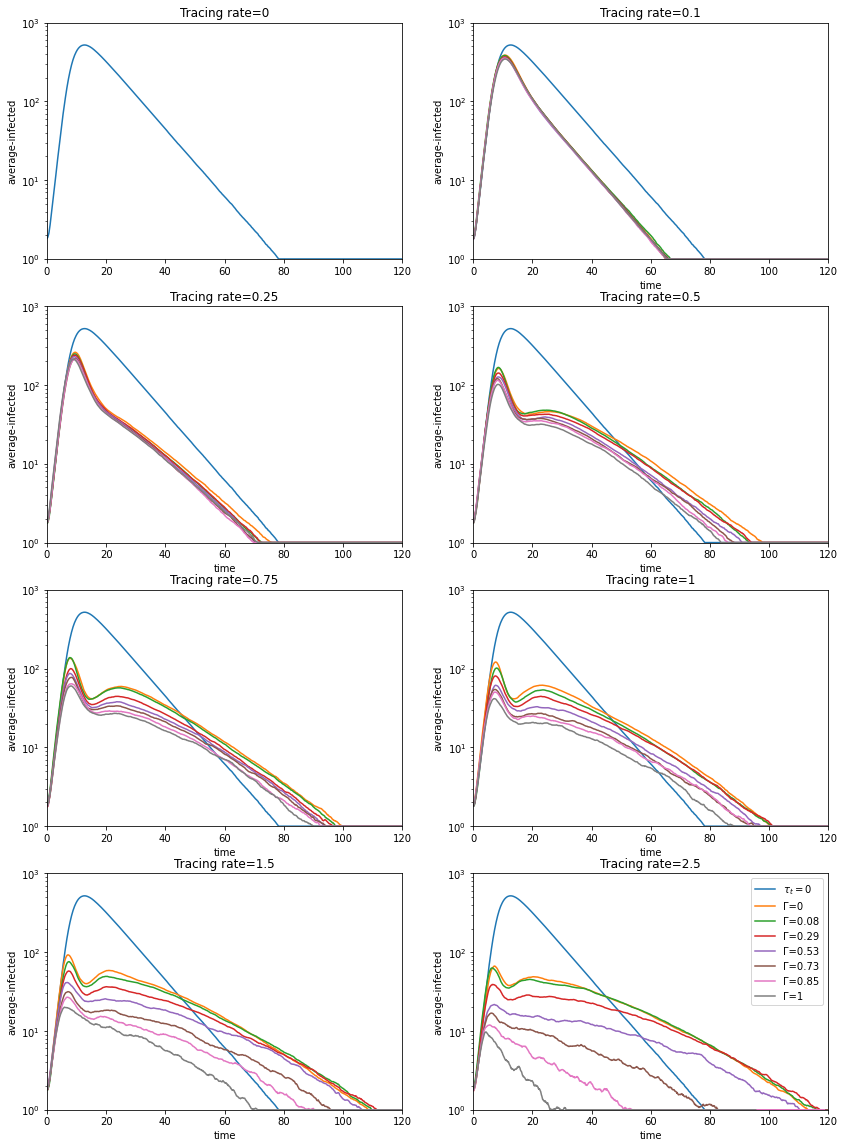

In [67]:
import matplotlib.pyplot as plt
overlaps = sorted(sts.keys())

fig, ax = plt.subplots(4, 2, figsize=(14, 20))
ax[0][0].set_yscale('log')
ax[0][0].set_title('Tracing rate=' + str(0))
ax[0][0].set_xlim(0, 120)
ax[0][0].plot(sts[1][0]['time'], sts[1][0]['average-infected'], label=r'$\tau_t=0$')
ax[0][0].set_ylabel('average-infected')
ax[0][0].set_ylim(1, 1000)


for k, taut in enumerate(sts[0]):
    if type(taut) == str:
        continue
    i = k // 2
    j = k % 2
    ax[i][j].set_ylim(1, 1000)
    ax[i][j].set_xlabel('time')
    ax[i][j].set_ylabel('average-infected')
    ax[i][j].set_xlim(0,120)
    ax[i][j].set_yscale('log')
    ax[i][j].plot(sts[1][0]['time'], sts[1][0]['average-infected'], label=r'$\tau_t=0$')
    ax[i][j].set_title('Tracing rate=' + str(taut))
    for overlap in overlaps:
        to_plot = sts[overlap][taut]['average-infected']
#         to_plot[to_plot<1] = 1
        ax[i][j].plot(sts[overlap][taut]['time'], to_plot, label='\u0393='+str(overlap))
        
plt.legend()
plt.savefig('fig/overlap-avg-infected-foreach-taut')

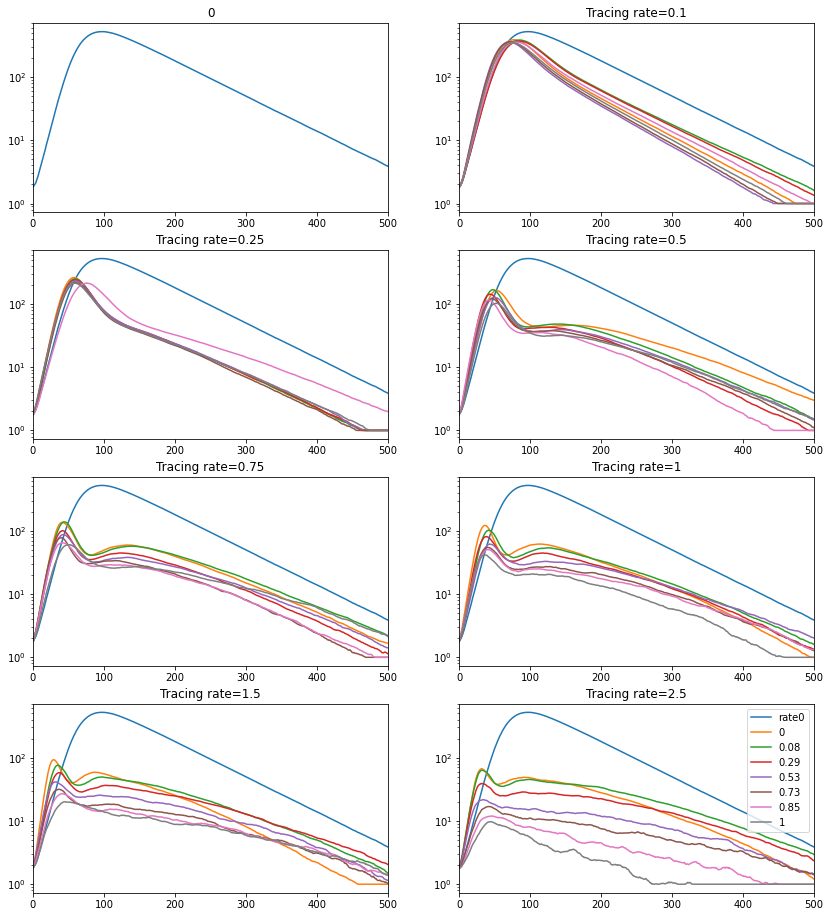

In [38]:
import matplotlib.pyplot as plt
overlaps = sorted(sts.keys())

fig, ax = plt.subplots(4, 2, figsize=(14, 16))
ax[0][0].set_title('Tracing rate=' + str(0))
ax[0][0].set_yscale('log')
ax[0][0].set_title(0)
ax[0][0].set_xlim(0, 500)
ax[0][0].plot(sts[1][0]['average-infected'], label='rate0')

for k, taut in enumerate(sts[0]):
    if type(taut) == str:
        continue
    i = k // 2
    j = k % 2
    ax[i][j].set_xlim(0,500)
    ax[i][j].set_yscale('log')
    ax[i][j].plot(sts[1][0]['average-infected'], label='rate0')
    ax[i][j].set_title('Tracing rate=' + str(taut))
    for overlap in overlaps:
        to_plot = sts[overlap][taut]['average-infected']
        to_plot[to_plot<1] = 1
        ax[i][j].plot(to_plot, label=overlap)
        
plt.legend()

<h1> Profiling

In [19]:
importlib.reload(run)

<module 'run' from 'D:\\OneDrive - University of Southampton\\PhD\\Contact\\run.py'>

In [24]:
import lib.utils as utils
import run
import importlib
import lib.simulation as sim
importlib.reload(run)
profiler = utils.Profiler()
with profiler():
    st = run.run_mock(netsize=1000, multip=False, dual=True, niters=5, nevents=0, seed=23, tautrange=False, draw=False)
profiler.stat()

For taut = 0.1
Simulating network - No. 0
Running iteration 0:                                                                                                
---> Result:956 total infected persons over time.                                                                   
Running iteration 1:                                                                                                
---> Result:971 total infected persons over time.                                                                   
Running iteration 2:                                                                                                
---> Result:959 total infected persons over time.                                                                   
Running iteration 3:                                                                                                
---> Result:968 total infected persons over time.                                                                   
Running iteration 4:  